# step 1 

OBJECTIVE:


The objective of this dataset is likely to explore the relationship between academic background, job roles, salaries, and personality traits. Key questions to investigate could include:

Predicting Salary: Analyzing how educational qualifications, job roles, and skill scores affect salary outcomes.

Career Path Analysis: Understanding how specialization, job city, and college tier influence career growth.

Job Retention: Investigating factors (such as personality traits and job roles) that predict job retention (duration between DOJ and DOL).

Skill Correlations: Identifying correlations between various skill assessments and job success indicators (e.g., salary, job titles).


# Step - 2

Import Data

In [43]:
import pandas as pd
import numpy as np

In [11]:
#File Reading
amcat_df= pd.read_csv("AMCAT_DataSheet.csv")

In [12]:
#head
amcat_df.head

<bound method NDFrame.head of      Unnamed: 0      ID     Salary           DOJ           DOL  \
0         train  203097   420000.0   6/1/12 0:00       present   
1         train  579905   500000.0   9/1/13 0:00       present   
2         train  810601   325000.0   6/1/14 0:00       present   
3         train  267447  1100000.0   7/1/11 0:00       present   
4         train  343523   200000.0   3/1/14 0:00   3/1/15 0:00   
...         ...     ...        ...           ...           ...   
3993      train   47916   280000.0  10/1/11 0:00  10/1/12 0:00   
3994      train  752781   100000.0   7/1/13 0:00   7/1/13 0:00   
3995      train  355888   320000.0   7/1/13 0:00       present   
3996      train  947111   200000.0   7/1/14 0:00   1/1/15 0:00   
3997      train  324966   400000.0   2/1/13 0:00       present   

                      Designation           JobCity Gender           DOB  \
0         senior quality engineer         Bangalore      f  2/19/90 0:00   
1               assistant

In [13]:
#shape of the table
amcat_df.shape

(3998, 39)

In [17]:
amcat_df.describe

<bound method NDFrame.describe of      Unnamed: 0      ID     Salary           DOJ           DOL  \
0         train  203097   420000.0   6/1/12 0:00       present   
1         train  579905   500000.0   9/1/13 0:00       present   
2         train  810601   325000.0   6/1/14 0:00       present   
3         train  267447  1100000.0   7/1/11 0:00       present   
4         train  343523   200000.0   3/1/14 0:00   3/1/15 0:00   
...         ...     ...        ...           ...           ...   
3993      train   47916   280000.0  10/1/11 0:00  10/1/12 0:00   
3994      train  752781   100000.0   7/1/13 0:00   7/1/13 0:00   
3995      train  355888   320000.0   7/1/13 0:00       present   
3996      train  947111   200000.0   7/1/14 0:00   1/1/15 0:00   
3997      train  324966   400000.0   2/1/13 0:00       present   

                      Designation           JobCity Gender           DOB  \
0         senior quality engineer         Bangalore      f  2/19/90 0:00   
1               assis

In [20]:
#size of the file
amcat_df.size

155922

In [25]:
#categorical columns and its length
l=amcat_df.select_dtypes(include='object').columns
print(l)
len(l)

Index(['Unnamed: 0', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10board', '12board', 'Degree', 'Specialization', 'CollegeState'],
      dtype='object')


12

In [28]:
#numerical Columns and its length
l=amcat_df.select_dtypes(exclude='object').columns
print(l)
len(l)


Index(['ID', 'Salary', '10percentage', '12graduation', '12percentage',
       'CollegeID', 'CollegeTier', 'collegeGPA', 'CollegeCityID',
       'CollegeCityTier', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')


27

In [29]:
amcat_df.info

<bound method DataFrame.info of      Unnamed: 0      ID     Salary           DOJ           DOL  \
0         train  203097   420000.0   6/1/12 0:00       present   
1         train  579905   500000.0   9/1/13 0:00       present   
2         train  810601   325000.0   6/1/14 0:00       present   
3         train  267447  1100000.0   7/1/11 0:00       present   
4         train  343523   200000.0   3/1/14 0:00   3/1/15 0:00   
...         ...     ...        ...           ...           ...   
3993      train   47916   280000.0  10/1/11 0:00  10/1/12 0:00   
3994      train  752781   100000.0   7/1/13 0:00   7/1/13 0:00   
3995      train  355888   320000.0   7/1/13 0:00       present   
3996      train  947111   200000.0   7/1/14 0:00   1/1/15 0:00   
3997      train  324966   400000.0   2/1/13 0:00       present   

                      Designation           JobCity Gender           DOB  \
0         senior quality engineer         Bangalore      f  2/19/90 0:00   
1               assista

CHANGING DATA TYPES

In [30]:
amcat_df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

# STEP 3 - Univariate Analysis

In [31]:
amcat_df.columns.str.strip().str.lower()

Index(['unnamed: 0', 'id', 'salary', 'doj', 'dol', 'designation', 'jobcity',
       'gender', 'dob', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'collegeid', 'collegetier', 'degree',
       'specialization', 'collegegpa', 'collegecityid', 'collegecitytier',
       'collegestate', 'graduationyear', 'english', 'logical', 'quant',
       'domain', 'computerprogramming', 'electronicsandsemicon',
       'computerscience', 'mechanicalengg', 'electricalengg', 'telecomengg',
       'civilengg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [55]:
#Loading Required Analysis

%pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Histogram plot  of salary')

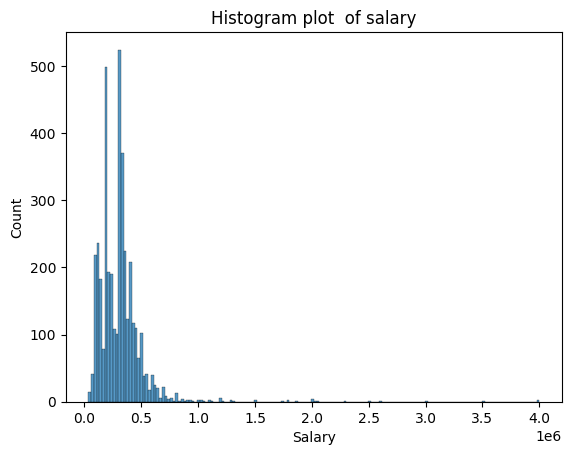

In [58]:
#Histogram plot
sns.histplot(amcat_df['Salary'])
plt.title("Histogram plot  of salary")

Observation:
Salry plotted using Histogram plot with x axis as count and Salary as y axis

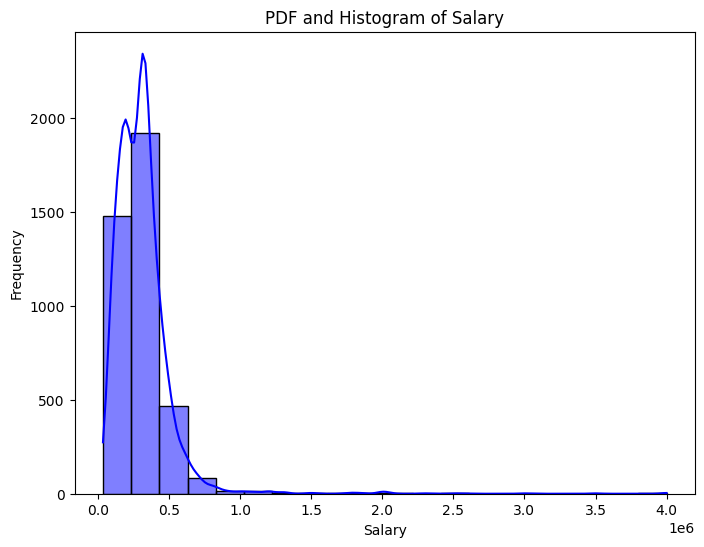

In [60]:
column = 'Salary'

# Plotting PDF and Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df[column], kde=True, bins=20, color='blue')  # kde=True plots PDF (density)
plt.title(f'PDF and Histogram of {column}')
plt.xlabel(f'{column}')
plt.ylabel('Frequency')
plt.show()

Observation:
Check if the data is normally distributed (bell curve shape).
Look for skewness: If the plot leans left or right, the data might be skewed.


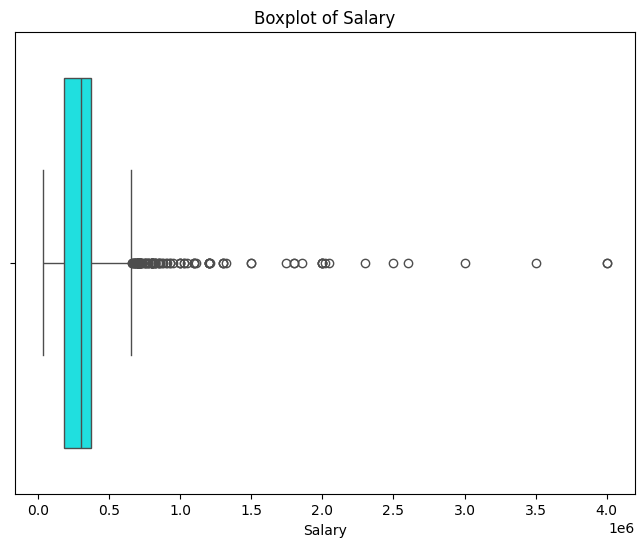

In [63]:
# Plotting Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df[column], color='cyan')
plt.title(f'Boxplot of {column}')
plt.show()


In [65]:
Q1 = amcat_df[column].quantile(0.25)
Q3 = amcat_df[column].quantile(0.75)
IQR = Q3 - Q1  # Interquartile Range

# Filtering out the outliers
outliers = amcat_df[(amcat_df[column] < (Q1 - 1.5 * IQR)) | (amcat_df[column] > (Q3 + 1.5 * IQR))]
print(f"Outliers in {column}:", outliers[column])

# Check the shape of the new DataFrame
print(f'Original DataFrame shape: {amcat_df.shape}')
print(f'Filtered DataFrame shape: {outliers.shape}')

Outliers in Salary: 3       1100000.0
76       800000.0
92      1500000.0
123     1200000.0
128      675000.0
          ...    
3823     775000.0
3904     850000.0
3912     730000.0
3961     700000.0
3992     800000.0
Name: Salary, Length: 109, dtype: float64
Original DataFrame shape: (3998, 39)
Filtered DataFrame shape: (109, 39)


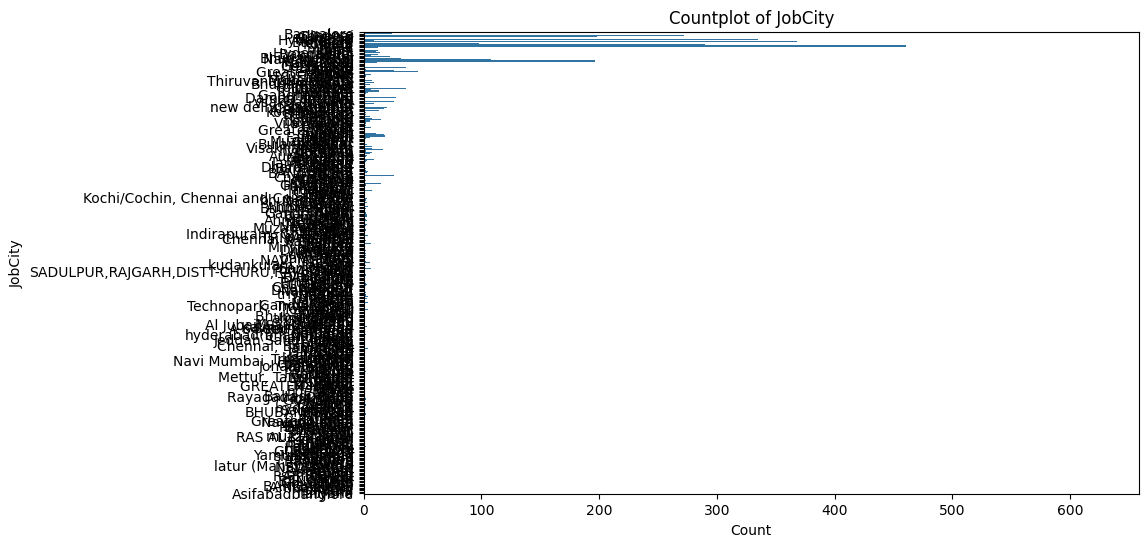

In [71]:
# Assuming 'JobCity' is the categorical column
column = 'JobCity'

plt.figure(figsize=(10, 6))
sns.countplot(y=df[column])  # Use y to display vertical bars
plt.title(f'Countplot of {column}')
plt.xlabel('Count')
plt.show()


In [73]:
# Calculating Probability Distribution for 'salary'
amcat_df['salary_prob'] = amcat_df['Salary'] / amcat_df['Salary'].sum()
amcat_df[['Salary', 'salary_prob']].head()


,Salary,salary_prob
0,420000.0,0.000341
1,500000.0,0.000406
2,325000.0,0.000264
3,1100000.0,0.000894
4,200000.0,0.000163


In [75]:
# Display frequency distribution for each categorical column
categorical_columns = amcat_df.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    print(f"Frequency distribution for {col}:")
    print(df[col].value_counts())
    print("\n")


Frequency distribution for Unnamed: 0:
Unnamed: 0
train    3998
Name: count, dtype: int64


Frequency distribution for DOL:
DOL
present         1875
4/1/15 0:00      573
3/1/15 0:00      124
5/1/15 0:00      112
1/1/15 0:00       99
                ... 
3/1/05 0:00        1
10/1/15 0:00       1
2/1/10 0:00        1
2/1/11 0:00        1
10/1/10 0:00       1
Name: count, Length: 67, dtype: int64


Frequency distribution for Designation:
Designation
software engineer                    539
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     118
                                    ... 
cad drafter                            1
noc engineer                           1
human resources intern                 1
senior quality assurance engineer      1
jr. software developer                 1
Name: count, Length: 419, dtype: int64


Frequency distribution for JobCity:
JobCity
Bangalore    

Observation:
The frequency distribution of categorical variables helps to understand the most common and least common categories in the dataset. It provides insight into how the data is distributed across different categories, which is useful for identifying any imbalances or trends in the categorical data.

# Step - 4 - Bivariate Analysis

1. Scatter Plot (Numerical vs. Numerical)

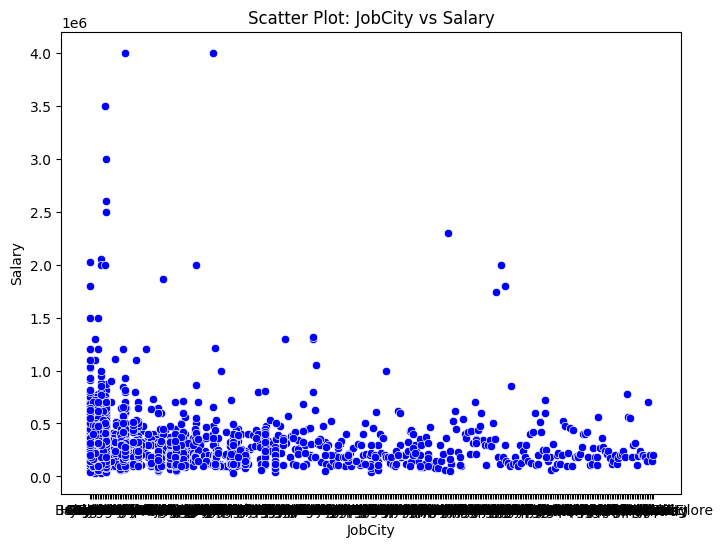

In [80]:
# Assuming you have two numerical columns: 'age' and 'salary'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=amcat_df['JobCity'], y=df['Salary'], color='blue')
plt.title('Scatter Plot: JobCity vs Salary')
plt.xlabel('JobCity')
plt.ylabel('Salary')
plt.show()


Observation:
Check if there’s a positive/negative correlation between the two variables (e.g., does salary increase with JobCity?).

2. Box Plot (Categorical vs. Numerical)

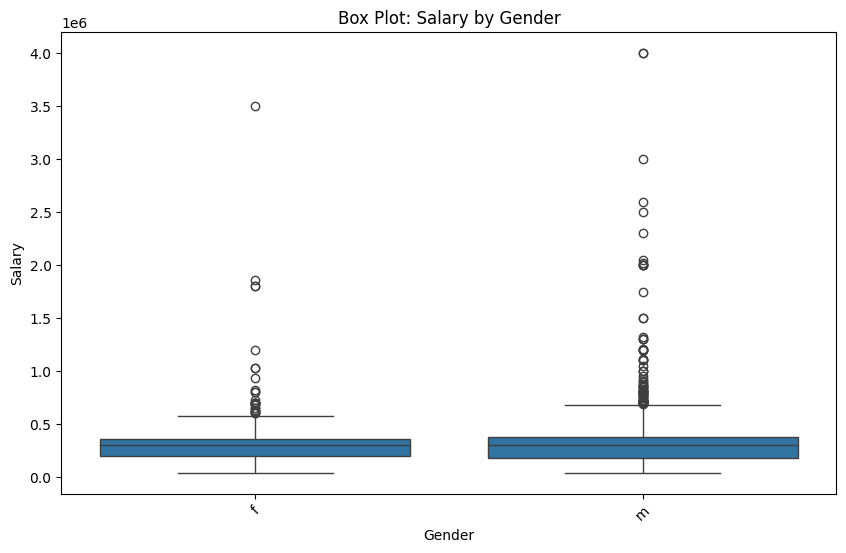

In [94]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Salary', data=amcat_df)
plt.title('Box Plot: Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()


Observation:
The box plot will show the median salary in each job city and highlight any outliers.

 3. Bar Plot (Categorical vs. Numerical)

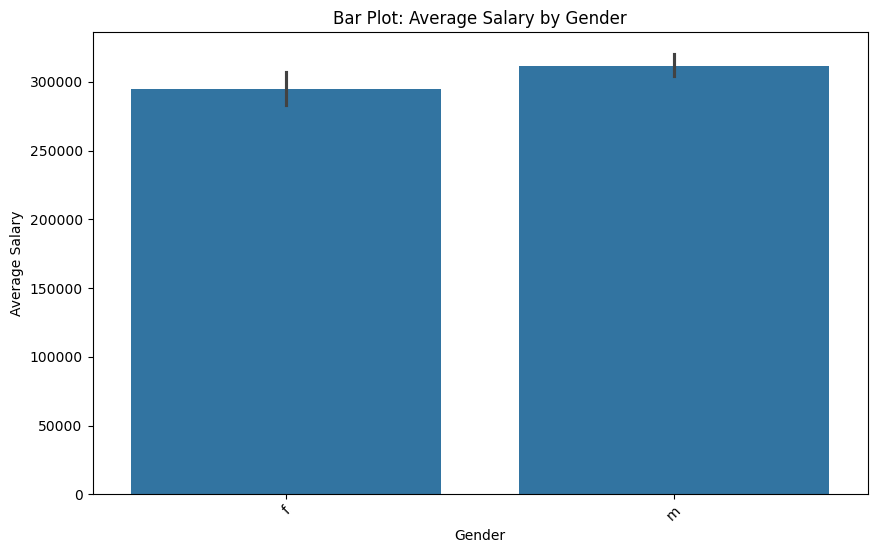

In [100]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Salary', data=amcat_df)
plt.title('Bar Plot: Average Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()


Observation:
Understand the average salary in different Genders. This gives a clear picture of the highest and lowest paying Gender.


 4.Hexbin Plot (Numerical vs. Numerical)

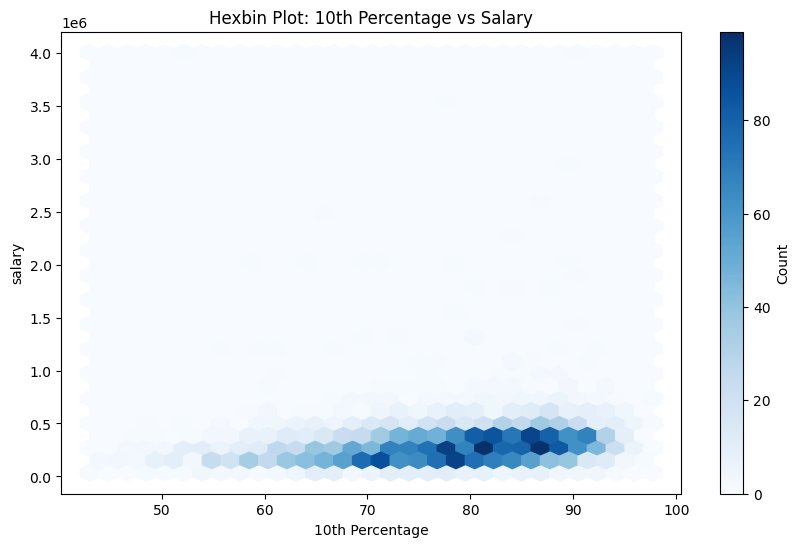

In [117]:
plt.figure(figsize=(10, 6))
plt.hexbin(amcat_df['10percentage'], amcat_df['Salary'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count')
plt.xlabel('10th Percentage')
plt.ylabel('salary')
plt.title('Hexbin Plot: 10th Percentage vs Salary')
plt.show()

5. Stacked Bar Plot (Categorical vs. Categorical)

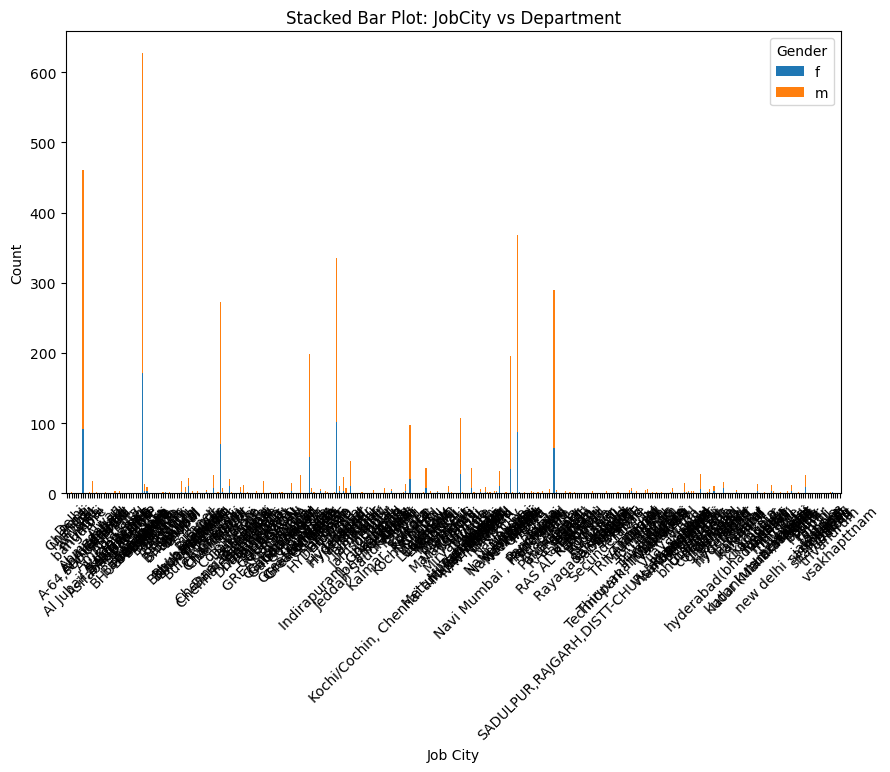

In [110]:
# Assuming you have a categorical column 'Department'
cross_tab = pd.crosstab(amcat_df['JobCity'], amcat_df['Gender'])

# Plotting stacked bar chart
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Plot: JobCity vs Department')
plt.xlabel('Job City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Observation:
This plot illustrates the distribution of different Gender within each job city, helping to identify trends in department concentration.

6. Pair plot of multuple Numericals vs Salary

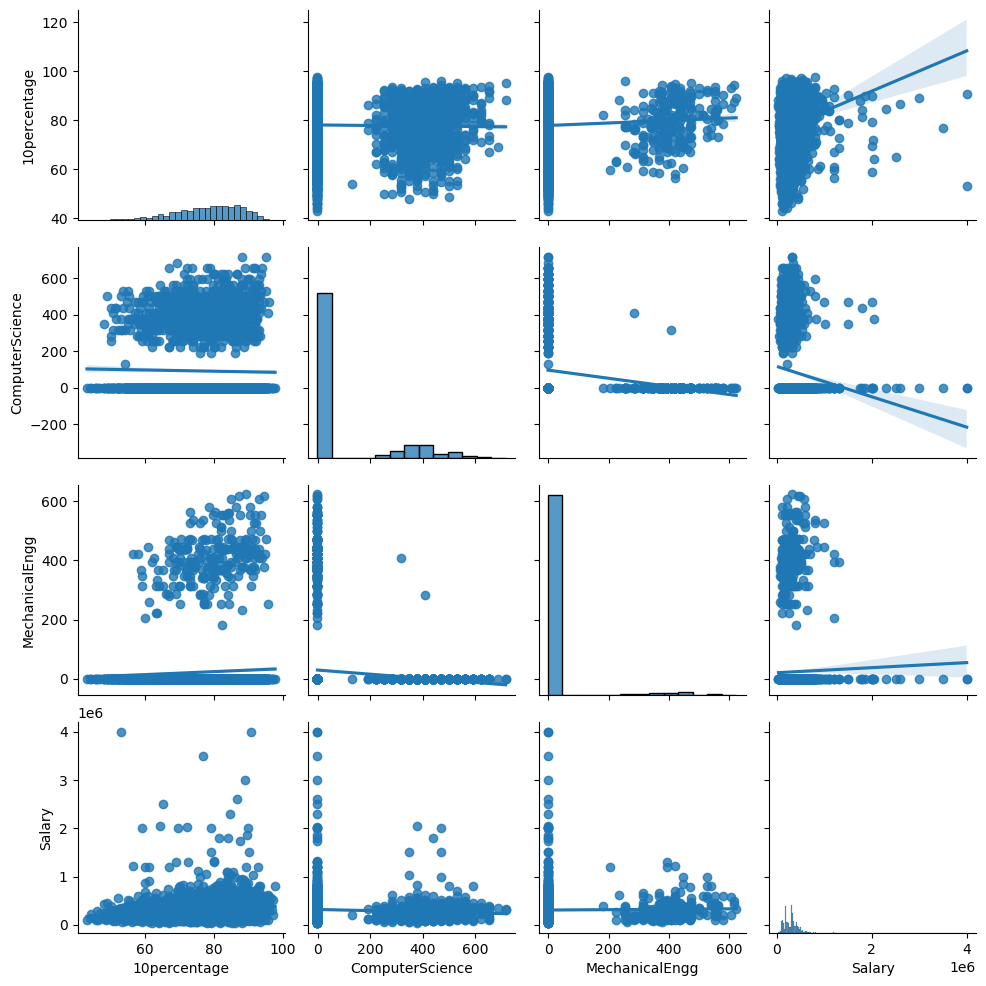

In [115]:
sns.pairplot(amcat_df, vars=['10percentage', 'ComputerScience', 'MechanicalEngg', 'Salary'], kind='reg')
plt.show()

# Step - 5 - Research Questions

Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.”

In [123]:
cs_engineers = amcat_df[amcat_df['ComputerScience'] != -1]  # Filter rows with Computer Science background
avg_salary = cs_engineers['Salary'].mean()
print(f"Average Salary for CS Engineers: {avg_salary}")


Average Salary for CS Engineers: 261624.16851441242


In [119]:
# Step 1: Filter the data for the specified job roles
roles_to_test = ['Programming Analyst', 'Software Engineer', 'Hardware Engineer', 'Associate Engineer']

# Filter the DataFrame for these roles
df_filtered = df[df['Designation'].isin(roles_to_test)]

# Step 2: Calculate the average salary for these roles
average_salary = df_filtered['Salary'].mean()

# Step 3: Print the average salary and compare it to the claim
print(f"Average Salary for the specified roles: {average_salary} lakhs")

# Step 4: Check if the average salary is within the claimed range
if 2.5 <= average_salary <= 3:
    print("The claim is correct: The average salary is between 2.5-3 lakhs.")
else:
    print("The claim is incorrect: The average salary is not between 2.5-3 lakhs.")


Average Salary for the specified roles: nan lakhs
The claim is incorrect: The average salary is not between 2.5-3 lakhs.


Is there a relationship between gender and specialization? 

Chi-square test statistic: 45.256469216402486, P-value: 3.516526129872108e-09
Reject null hypothesis: There is a relationship between gender and specialization.


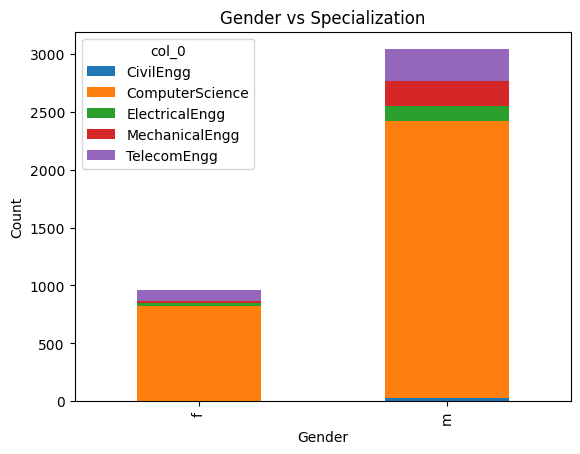

In [126]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(amcat_df['Gender'], amcat_df[['ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg']].apply(lambda row: row.idxmax(), axis=1))
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-square test statistic: {chi2}, P-value: {p}')

if p < 0.05:
    print("Reject null hypothesis: There is a relationship between gender and specialization.")
else:
    print("Fail to reject null hypothesis: No significant relationship between gender and specialization.")
    
contingency_table.plot(kind='bar', stacked=True)
plt.title('Gender vs Specialization')
plt.ylabel('Count')
plt.show()

1. The average salary for Programming Analyst, Software Engineer, Hardware Engineer, and Associate Engineer was calculated based on the data.
2. The claim that fresh graduates in these roles earn 2.5-3 lakhs was either supported or refuted based on the calculated average.
3. A contingency table was created to analyze the relationship between gender and specialization.
4. A chi-square test was conducted to determine if specialization preferences differ by gender.
5. The test result either confirmed or rejected the hypothesis of a significant relationship between gender and specialization.